## <b> Evaluation Project 3 Avacado Project </b>
<b><em> By: Mr.Lokesh Baviskar </em></b>

<b><em> Batch: 1833 </em></b>

### <b> Problem Statement:</b>
<em><b>
Avocado is a fruit consumed by people heavily in the United States. 

Content : 
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

        The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
     
        Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

</b></em>
- <b>Some relevant columns in the dataset:

    - Date - The date of the observation
    - AveragePrice - the average price of a single avocado
    - type - conventional or organic
    - year - the year
    - Region - the city or region of the observation
    - Total Volume - Total number of avocados sold
    - 4046 - Total number of avocados with PLU 4046 sold
    - 4225 - Total number of avocados with PLU 4225 sold
    - 4770 - Total number of avocados with PLU 4770 sold </b>

<b> Inspiration /Label </b>

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

<b>To download the dataset, use the link given below. 

Downlaod Files:</b>
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [5]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing Avocado Csv file using pandas

In [7]:
df=pd.read_csv('avocado.csv')

In [11]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 18249
No of Columns: 14


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [12]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large,  Let check for any entry which is repeated or duplicated in dataset at same date. </b>

In [22]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

0

- #### Comment:
     Dataset doesnot contain Any duplicate entry. So Yes To Go !!!

### Missing value check 

<AxesSubplot:>

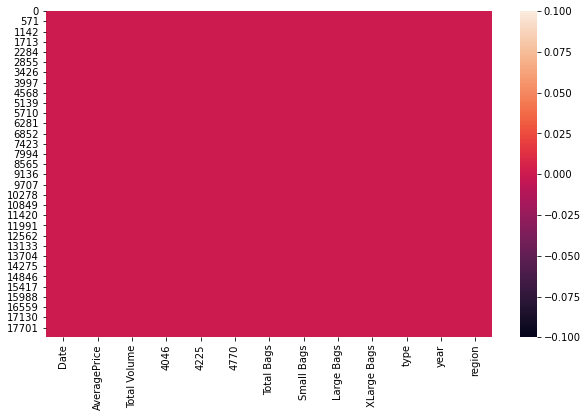

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [32]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
region                     0             0.0
year                       0             0.0
type                       0             0.0
XLarge Bags                0             0.0
Large Bags                 0             0.0
Small Bags                 0             0.0
Total Bags                 0             0.0
4770                       0             0.0
4225                       0             0.0
4046                       0             0.0
Total Volume               0             0.0
AveragePrice               0             0.0
Date                       0             0.0


- #### Comment:
    - There is no missing values in dataset.

### Datatype Check

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


- #### Comment :
    - There are 13 features in data.
    - Region has object datatype.
    - Date by default data type is object which need to change to datetime datatype.
    - Other variable are float & int datatypes.

In [39]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [48]:
df['Date'].dtype

dtype('<M8[ns]')

### Statistical Matrix

<AxesSubplot:>

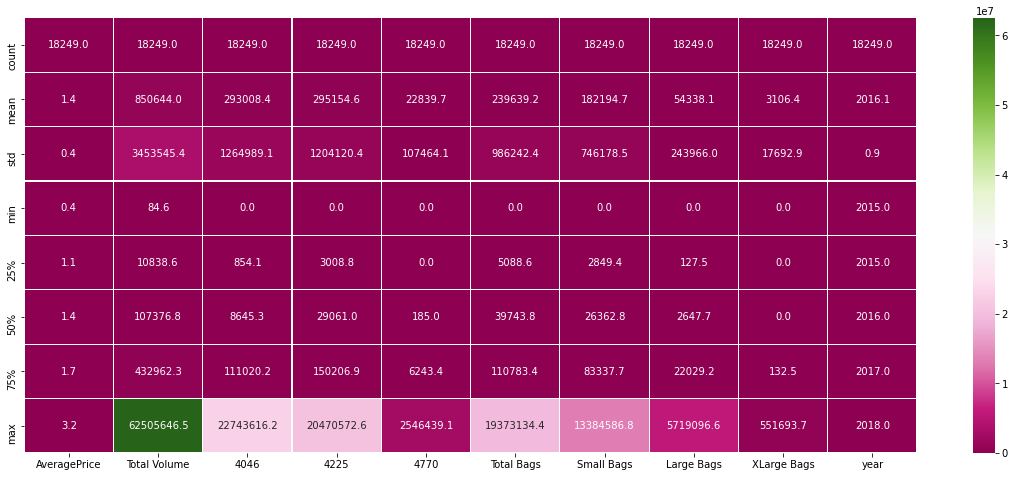

In [19]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [53]:
df.describe().T.round(3)

count        mean          std      min       25%        50%  \
AveragePrice  18249.0       1.406        0.403     0.44      1.10       1.37   
Total Volume  18249.0  850644.013  3453545.355    84.56  10838.58  107376.76   
4046          18249.0  293008.425  1264989.082     0.00    854.07    8645.30   
4225          18249.0  295154.568  1204120.401     0.00   3008.78   29061.02   
4770          18249.0   22839.736   107464.068     0.00      0.00     184.99   
Total Bags    18249.0  239639.202   986242.399     0.00   5088.64   39743.83   
Small Bags    18249.0  182194.687   746178.515     0.00   2849.42   26362.82   
Large Bags    18249.0   54338.088   243965.965     0.00    127.47    2647.71   
XLarge Bags   18249.0    3106.427    17692.895     0.00      0.00       0.00   
year          18249.0    2016.148        0.940  2015.00   2015.00    2016.00   

                    75%          max  
AveragePrice       1.66         3.25  
Total Volume  432962.29  62505646.52  
4046          111020.20  22743616.17  
4225          150206.86  20470572.61  
4770            6243.42   2546439.11  
Total Bags    110783.37  19373134.37  
Small Bags     83337.67  13384586.80  
Large Bags     22029.25   5719096.61  
XLarge Bags      132.50    551693.65  
year            2017.00      2018.00

- #### Comment :
    - We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
    - For most of columns have minimum value of zero.
    - Almost in all columns value of mean is greater than median. Data is right skewed.
    - For most of columns value of std. deviation is greater than mean i.e. data is spread. 

- <b> Lets do some Statistical Analysis. Start with find Average price of avocodo over the timeframe and according types </b>

In [86]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.4059784097758825 USD


Avacado varies from 0.44 USD To 3.25 USD with average price of 1.40 USD per unit

<AxesSubplot:title={'center':'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

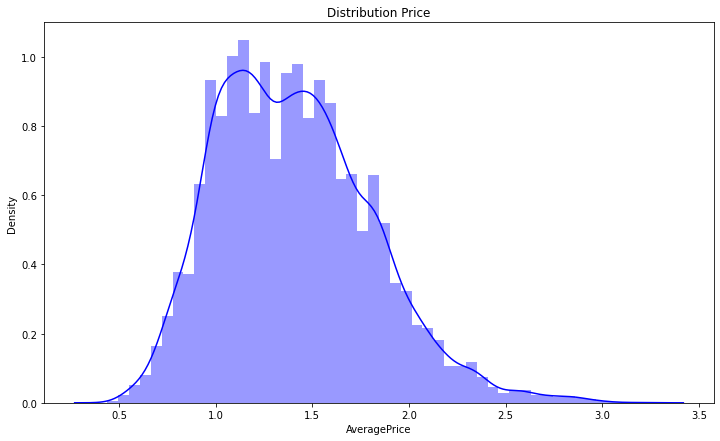

In [5]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='b')

- Most of cases Average price of Avacado varies between 1.1 and 1.6 USD/unit

In [57]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [63]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

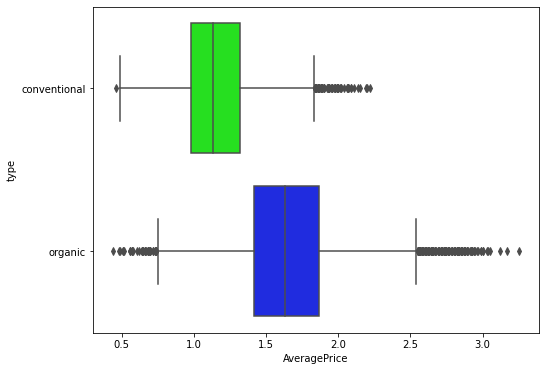

In [62]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

- #### Comment :
    - Oraganic Avocado is almost <u> 43% more costlier </u> than conventional Avacado.
    - We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
    - This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.
    
<b> Before going deeper with Average price to gain more insight as it has lot more to explore, just let do quick check over volumetric sell of Avacado. Normal tendency of most people is they dont want to pay more price so most probably if such scenerio exist then it will be reflected in total sales.</b>
    

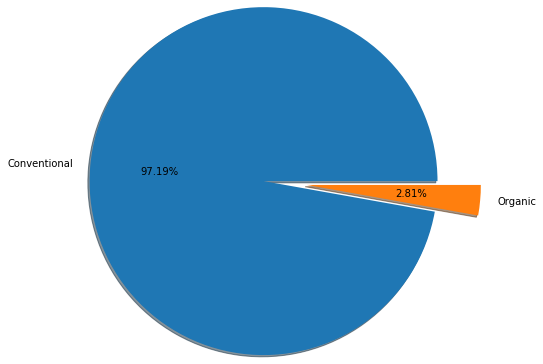

In [79]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [68]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

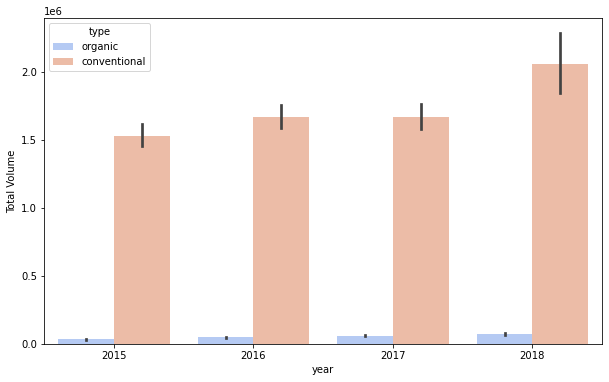

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

- #### Comment -
    - The sell of organic avacodo is <u> less than 3 %.</u>
    - <b> Conventional Avacado are in more demand.</b>
    - Barplot confirm same thing in yearwise sales volume.

<b> The Average price varies over year and season , lets dive to get some more insight over it.</b>

In [59]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [89]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

- #### Comment :
    - Oraganic Avocado is 40-50% costlier than conventional avacado.
    - Avacodo got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.
    - Except 2017 each year their is incresase in price of avacado. 
    
<b> Price hike over time, its okay !!!
    
But what about demand over timeframe ?, Lets check trend of demand through volume sell in next section. </b>

In [104]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

- #### Comment :
    - Sales of Avacado in 2017 is more than 2016 so price hike is may be as result of increase in demand or some supply chain issue.
    - sales in turn Demand is also increase over time.
    - 30 % increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier than conventional type.
    - There is also growth in demand of conventional type avocado year-wise but rate of growth of demand comparelative less than organic type. May be people becoming more health oriented.
    - XLarge Bags sales increase rapidly in 2017 compare to 2015.
    - If we look at trend from 2015 customer start buying buying Large or Xlarge bags compare to small bags in case of Conventional type. May be quantity & discount offer by shop may be playing role here.
    - People choosing small bags of organic avocado over large.Price factor playing here.
    


In [15]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

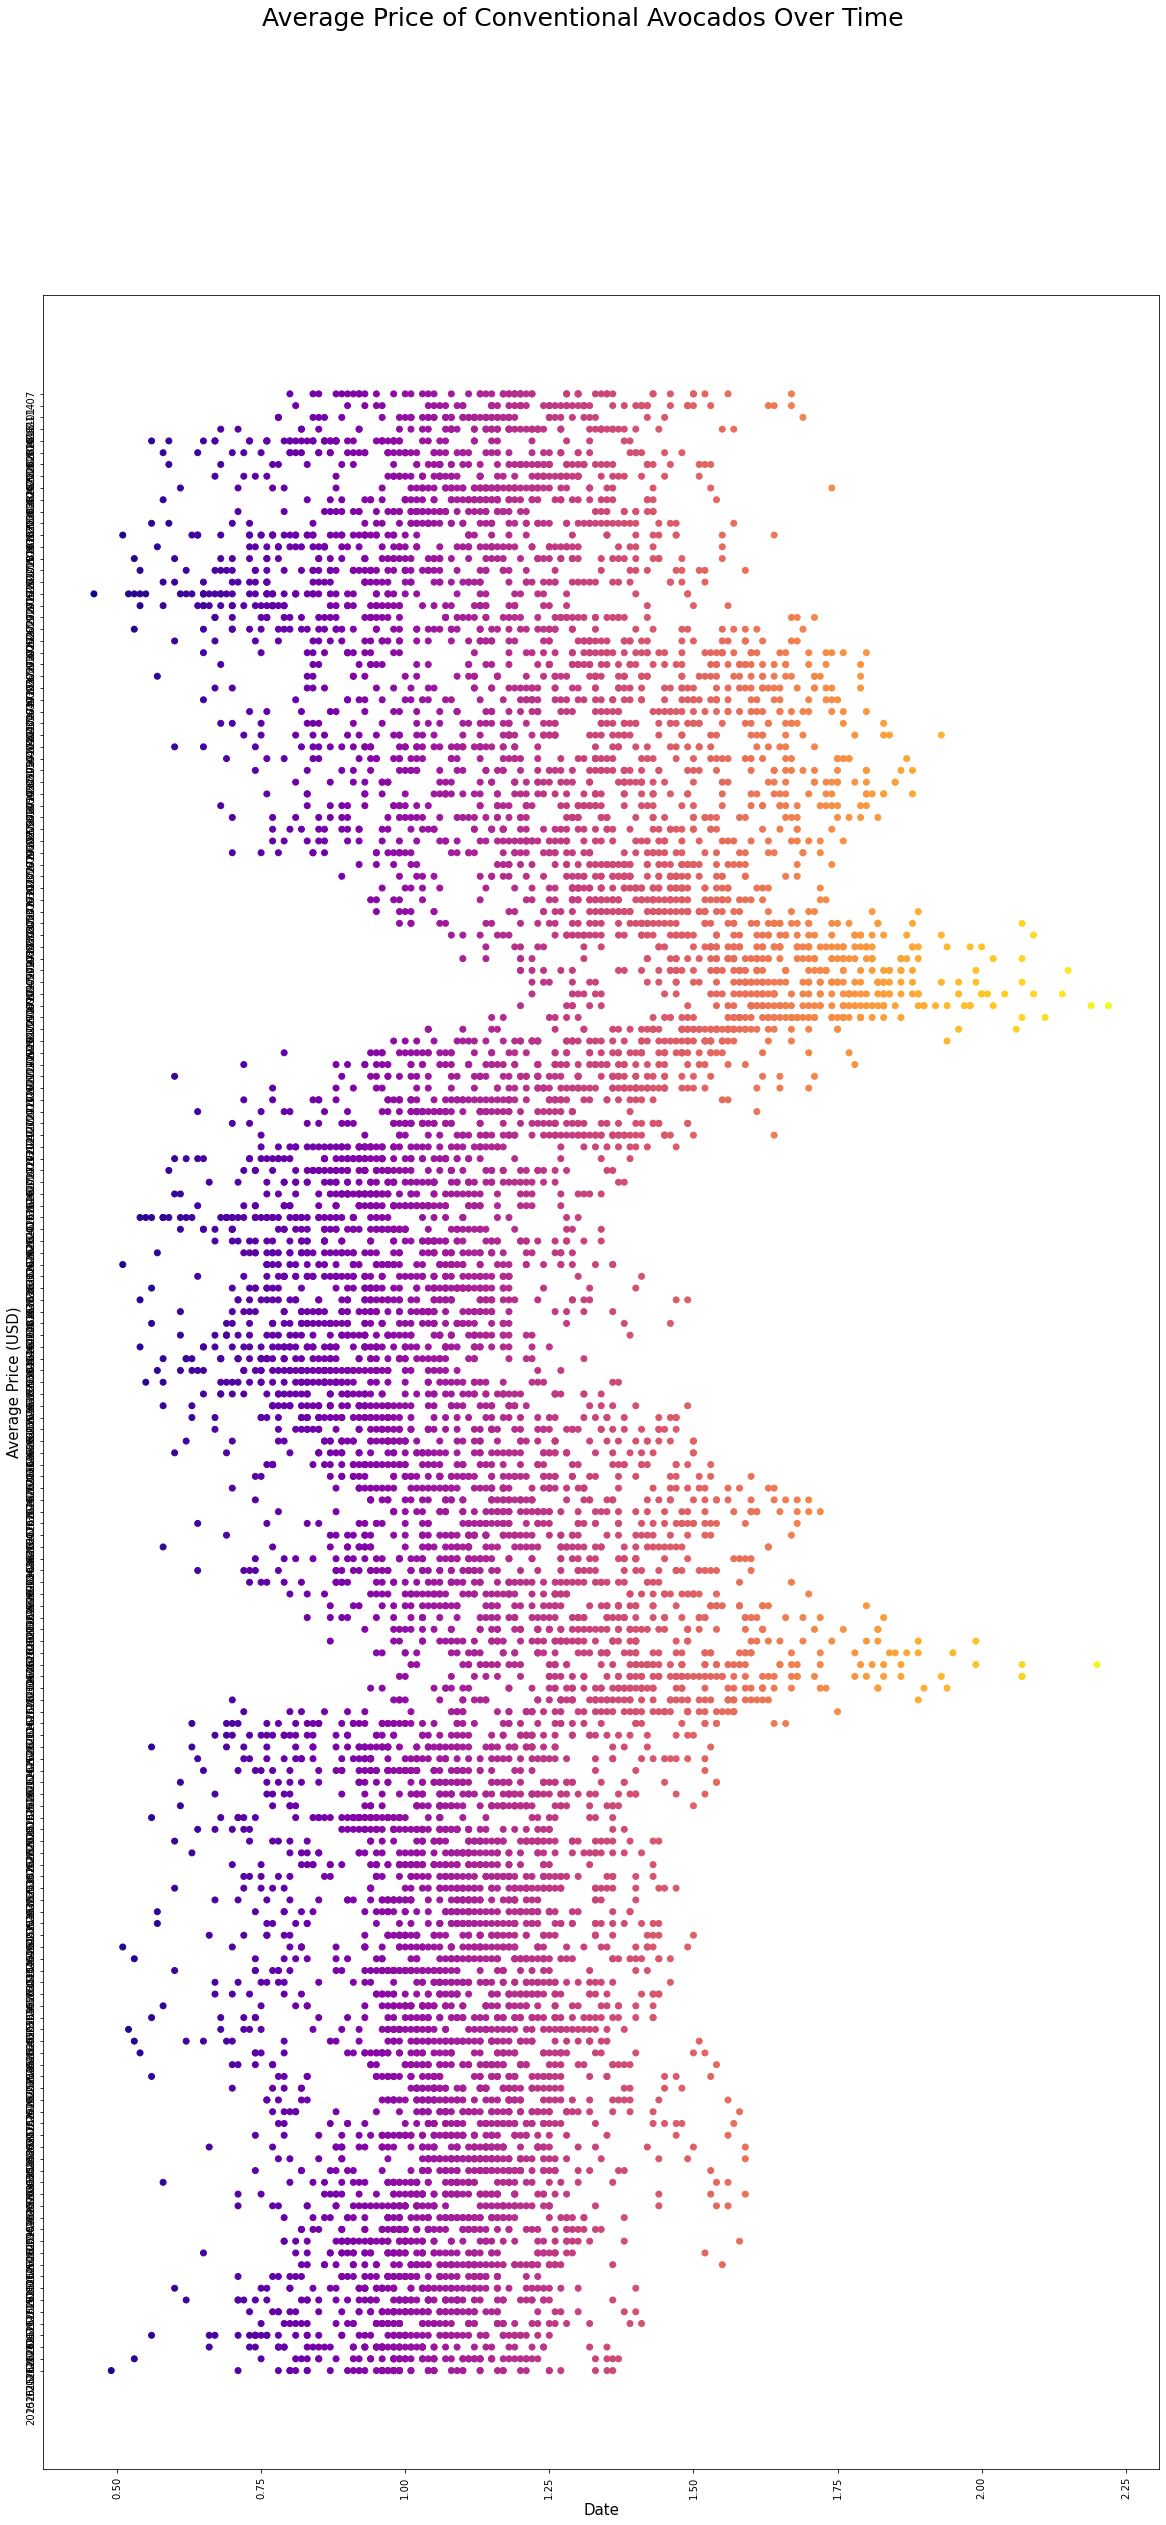

In [5]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (20, 40))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( avgPrices,dates, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15,)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

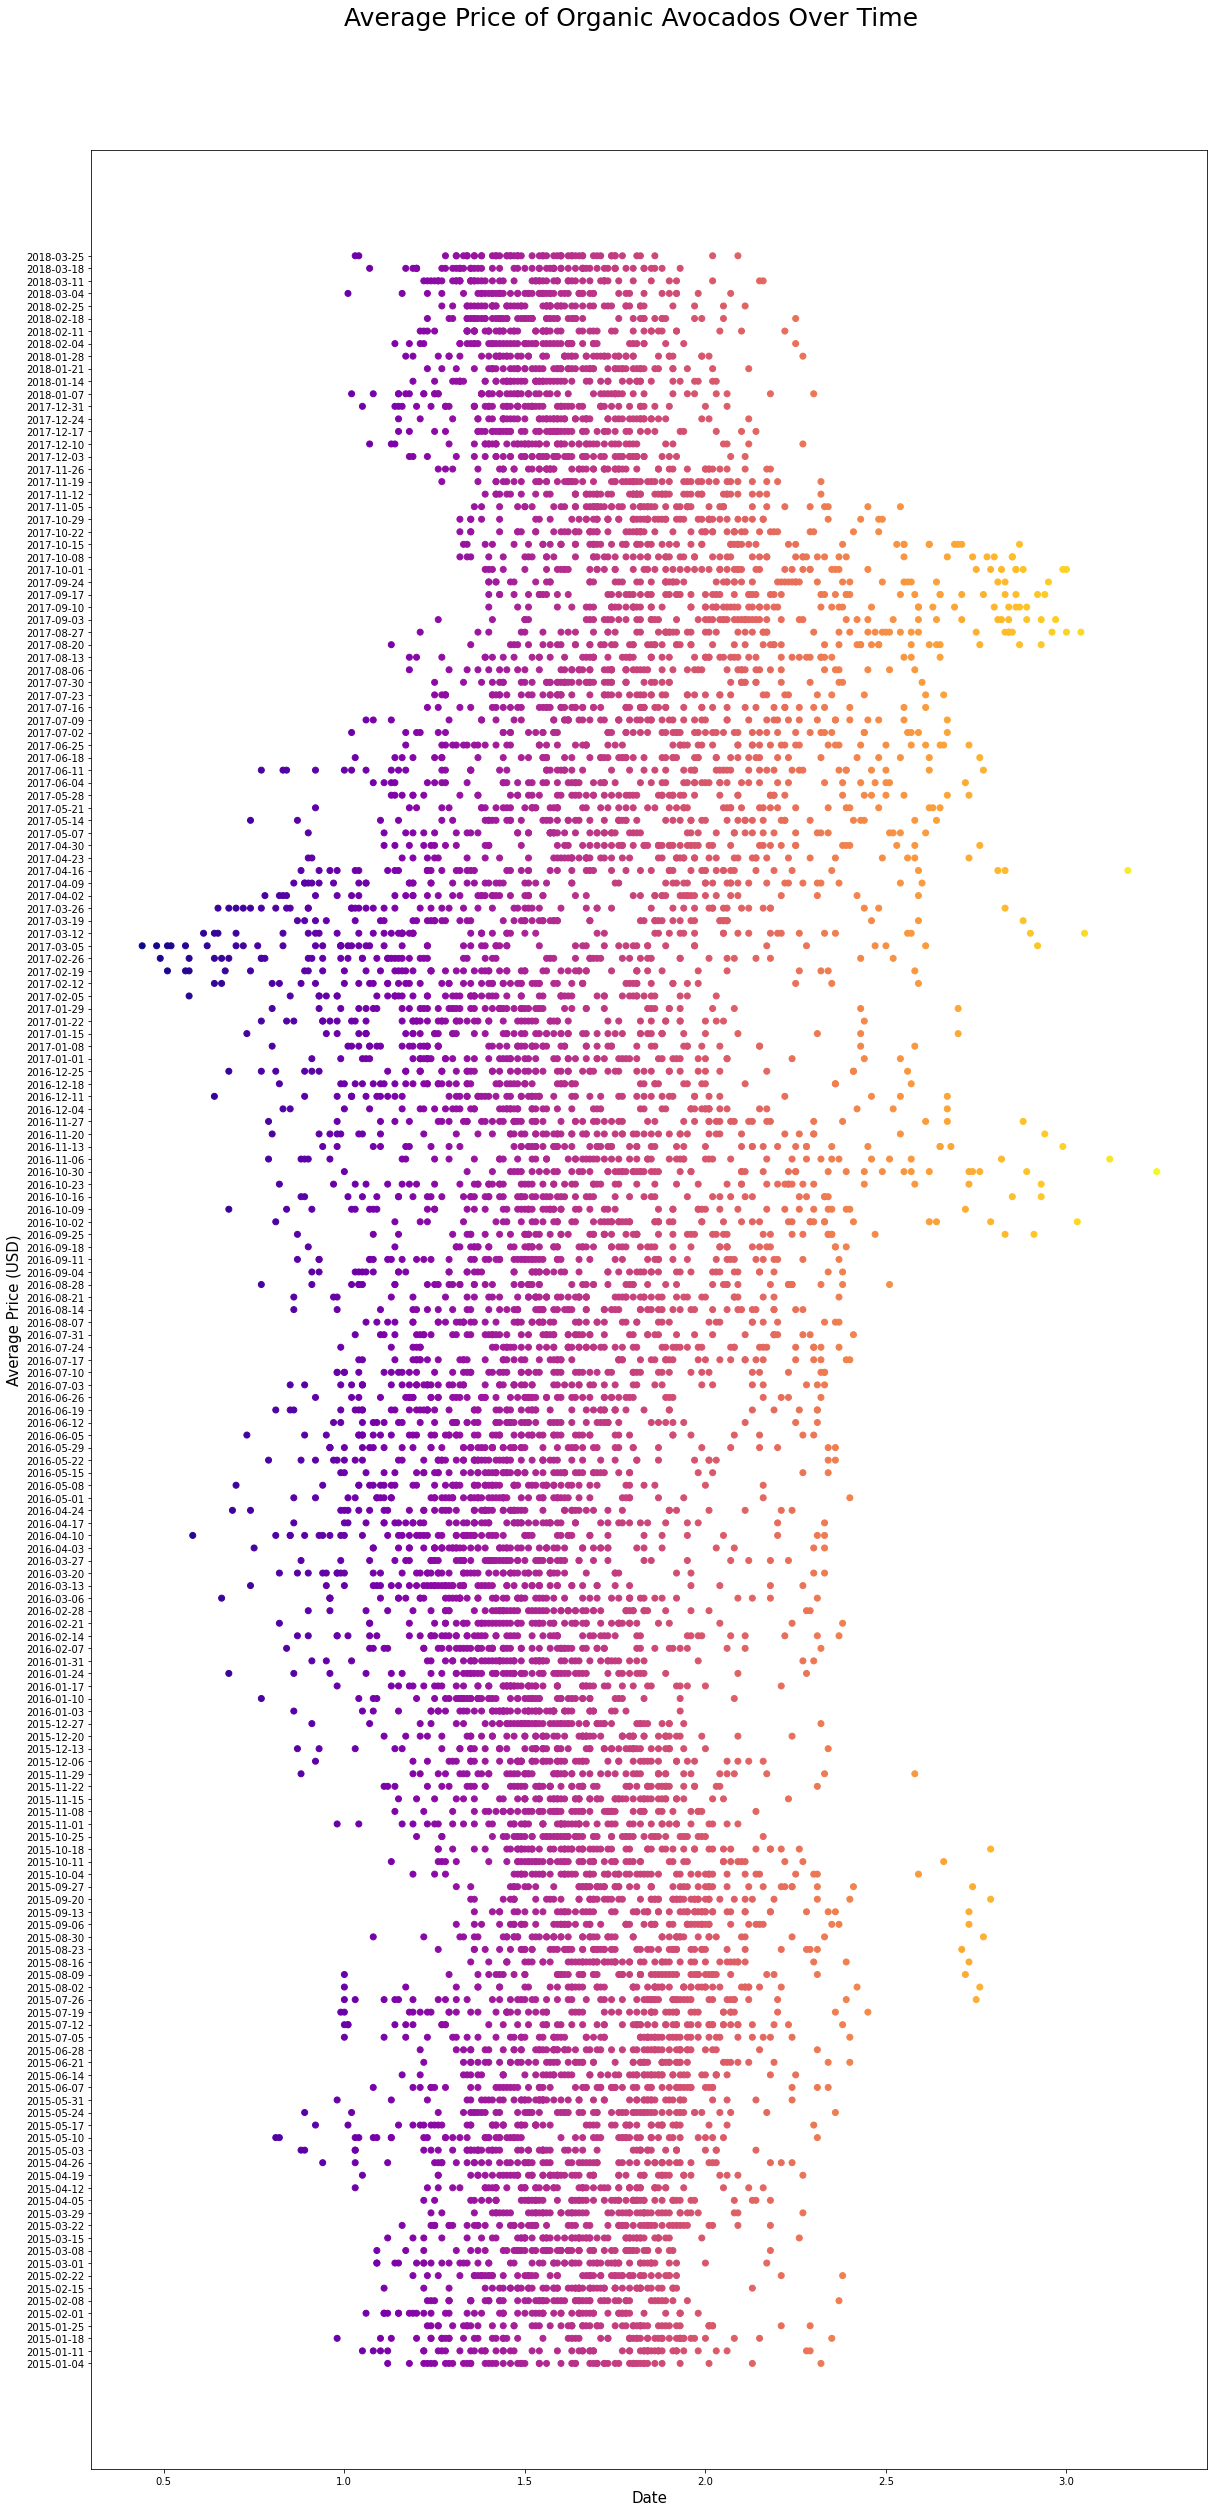

In [105]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (20, 40))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(avgPrices,dates, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

In [110]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

# EDA

In [55]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [19]:
df2=df.copy()

In [20]:
# Creating Datframe for numeric features
df2.drop(['Date','type','region','year'], axis=1, inplace=True)

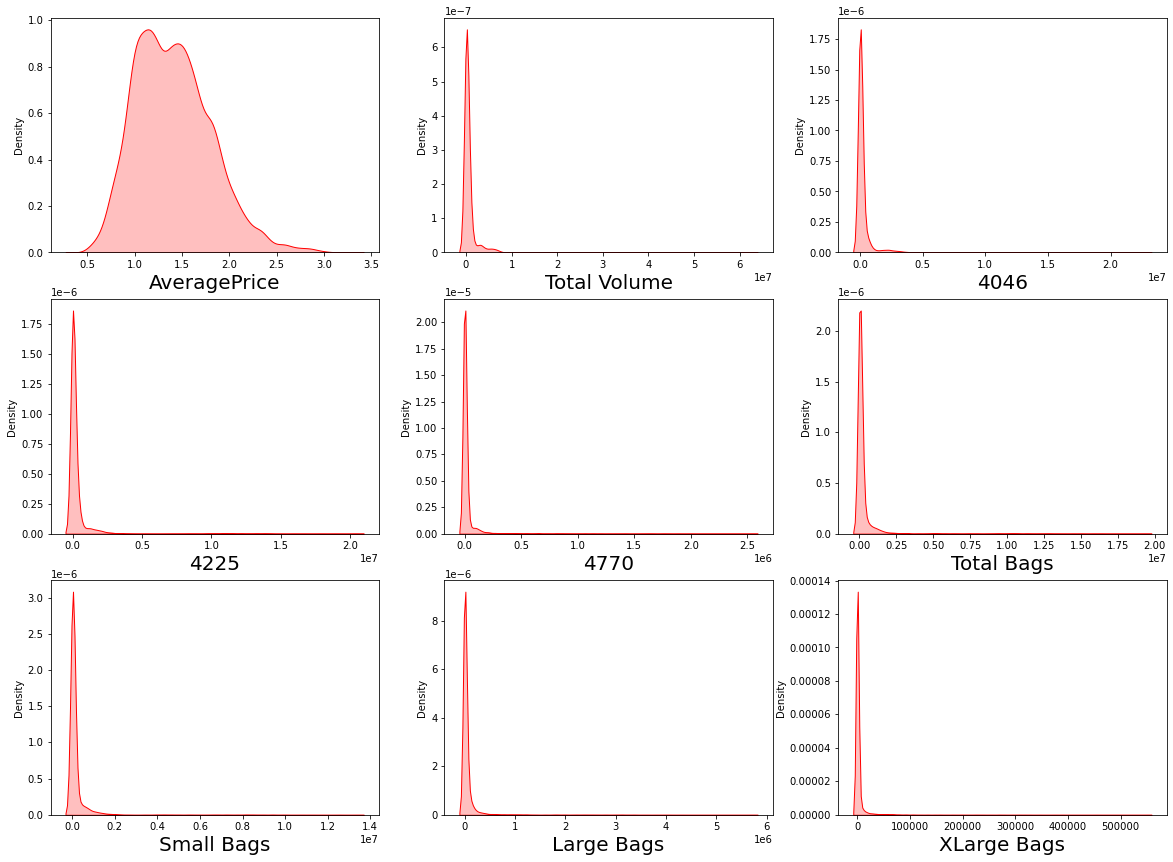

In [35]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- ####  Comment :
    - We can see skewed data with presence of outliers with sharp peak.
    - Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis.

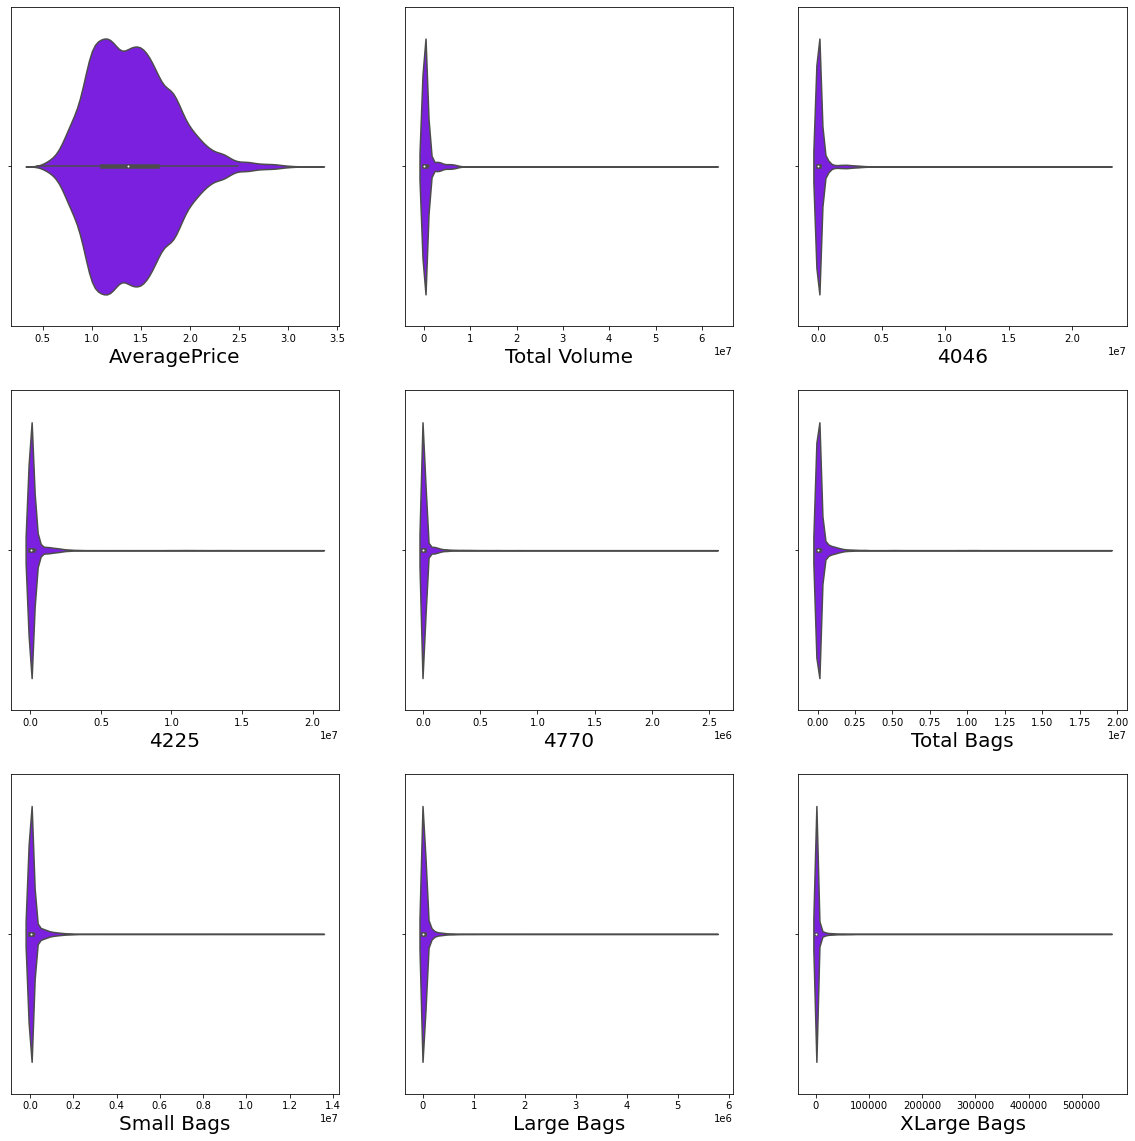

In [37]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- #### Comment :
    - For Majority Average price is in range of 1 to 1.5.
    - Rest of Violin plot show same story as distribution plot.

<b><em> Avacado availability and price also vary over the year according to seasonal changes.Lets check the variation Avg price and sales volume over each month.</em></b>
    
    For that purpose let create another copy dataframe and then split date column into Year,Month and Day.

In [39]:
# Copy of original dataframe
df3=df.copy()

In [40]:
df3['Year'], df3['Month'], df3['Day'] = df3['Date'].str.split('-').str
df3.drop(columns=['Date','year'], inplace=True) # Droping Duplicate columns

In [42]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Date']=df3['Day'].astype(int)
df3.drop(columns=['Day'], inplace=True)

### Univariate analysis of feature using date, months, year

In [44]:
# Checking unique values and Yearwise total No of sale entry
df3['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

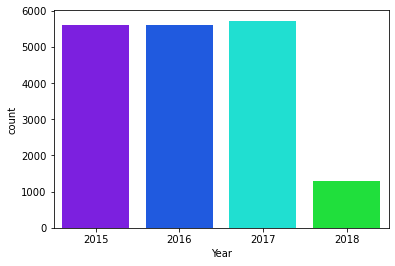

In [46]:
sns.countplot('Year',data=df3)

- #### Comment:
    - This dataset contain data from 2015 to 2018
    - Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018. 

### Approach :
- We want check Avg Price over each Month
- First we will check Sale entries per Months
- Next We will Avg Price over each month using Countplot
- Finally we will try to bring insight over relation of sales entries to Avg price over same month. 

##### Checking Month-Wise sales entries

<AxesSubplot:xlabel='Month', ylabel='count'>

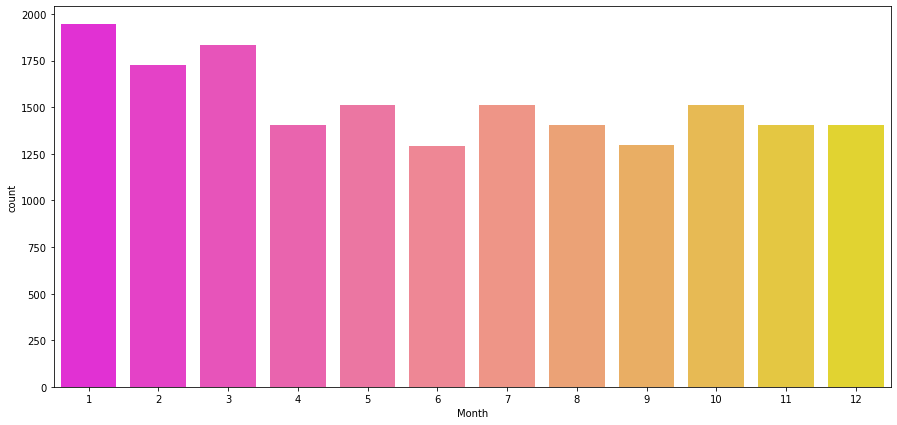

In [66]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3, palette="spring")

In [54]:
df3['Month'].value_counts().max()

1944

In [55]:
df3['Month'].value_counts().min()

1294

- #### Comment:
    - Maximum sales lead comes in month of Jan, Feb, March
    - Maximum sales demand of Avacodo is in month of Jan (1944 lead) & Minimum sales demand of Avacoda is in month of June

#### Checking Month-Wise Variation in Average Price

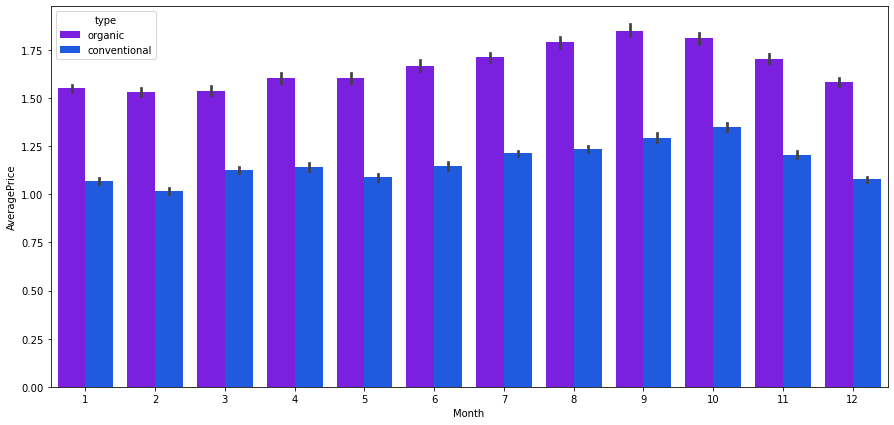

In [68]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df3)
plt.show()

In [69]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

<Figure size 720x720 with 0 Axes>

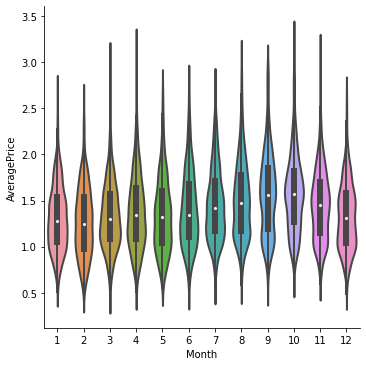

In [91]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df3, linewidth=2)
plt.show()

-  #### Comment :
    - In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.
    - There is not much upheaval in Organic type Avacoda over year peroid.
    - We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.
    
<b> But what causes such High demand in 1st quater of year ?

Simple Google gives answer 'FLAVOR'. Yes, Flavor!!!
    
Avocados are available year round like most agricultural commodities these days, but <u> <em> January through March  is the best time of year for flavor</em> </u>. It is during this time that the fruit has developed higher oil content, resulting in that buttery flavor and texture that we all love.
</b>

- <b> Now Let Compare Countplot of Sales Entries and Barplot of Avg Price Monthwise.</b> 
    - In first sight we can see in period of Augest to October price high & in that same time period sales order are minimum.
    - Opposite of it true in duration of Jan to March.
    - This variation applicable to conventional type while we cannot find such any relation in case of Organic avacado.
    
<b>In conclusion when Average sale price of 'Conventional Avacado' is high in same time less sales order are observe. Inshort Customer are less interested in buying avacado at high Price. 
</b>

#### Till Now we have not explore region feature , Now is time do it.

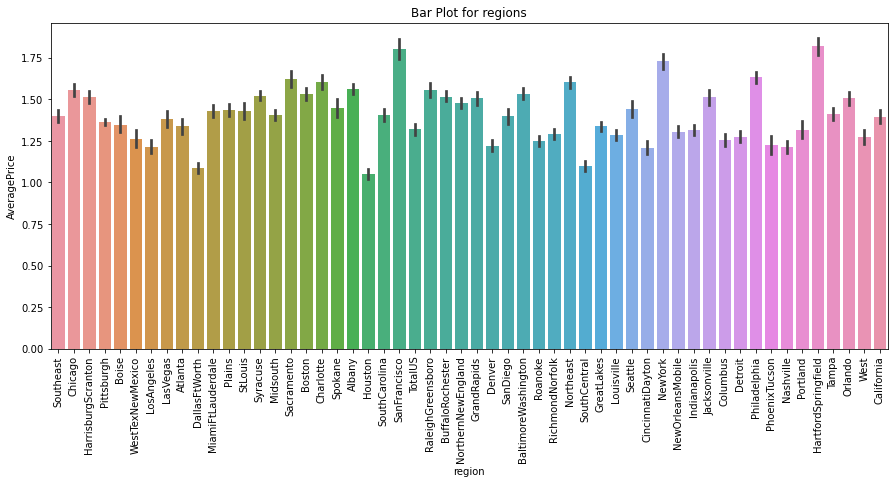

In [79]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df3)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

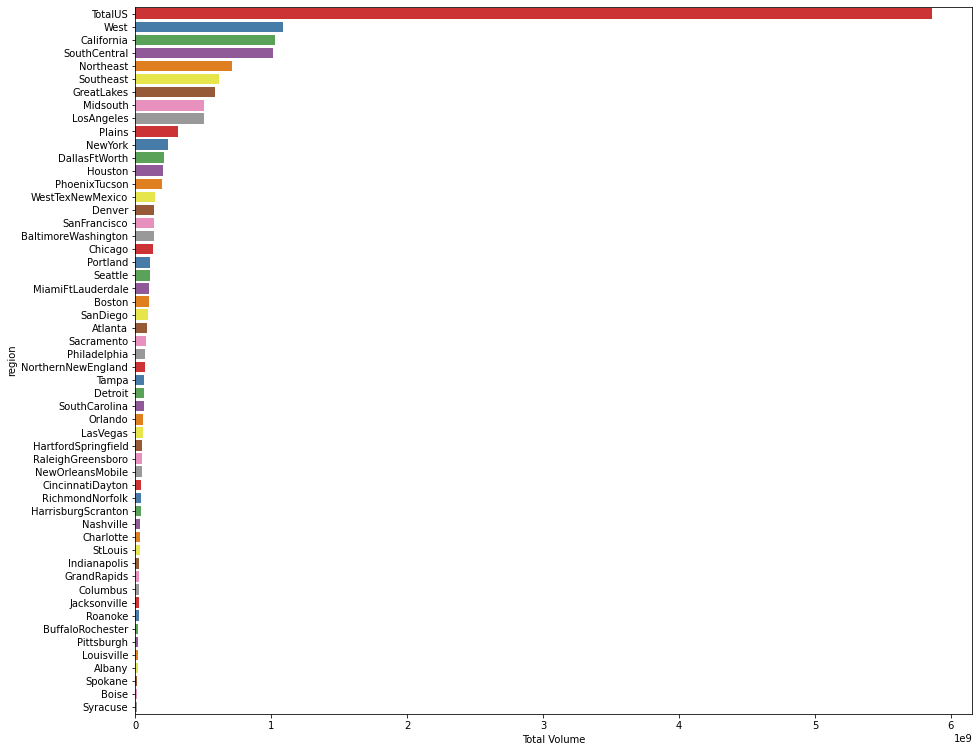

In [92]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [74]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

Total Volume    Total Bags    Small Bags    Large Bags  \
                             mean          mean          mean          mean   
region                                                                        
Albany               4.753787e+04  7.929747e+03  6.647765e+03  1.153496e+03   
Atlanta              2.621453e+05  8.449856e+04  5.160573e+04  3.207004e+04   
BaltimoreWashington  3.985619e+05  1.044561e+05  1.009397e+05  2.903985e+03   
Boise                4.264257e+04  1.597459e+04  1.384004e+04  2.103634e+03   
Boston               2.877929e+05  6.359609e+04  5.890659e+04  4.438365e+03   
BuffaloRochester     6.793630e+04  3.435134e+04  3.037998e+04  3.729050e+03   
California           3.044324e+06  7.298290e+05  6.778038e+05  3.642585e+04   
Charlotte            1.051939e+05  3.460930e+04  3.149069e+04  2.912684e+03   
Chicago              3.955690e+05  4.989763e+04  4.377116e+04  5.005547e+03   
CincinnatiDayton     1.317219e+05  6.182816e+04  1.675117e+04  4.429643e+04   
Columbus             8.873776e+04  2.963428e+04  2.387808e+04  5.103195e+03   
DallasFtWorth        6.166251e+05  1.374845e+05  1.207744e+05  1.543113e+04   
Denver               4.109542e+05  1.744290e+05  5.551362e+04  1.187601e+05   
Detroit              1.876403e+05  7.177534e+04  5.899134e+04  7.905232e+03   
GrandRapids          8.938383e+04  2.712750e+04  2.228839e+04  2.357398e+03   
GreatLakes           1.744505e+06  5.283303e+05  3.647559e+05  1.446617e+05   
HarrisburgScranton   1.236948e+05  4.002738e+04  3.778956e+04  1.780372e+03   
HartfordSpringfield  1.499128e+05  3.352962e+04  3.188923e+04  1.410794e+03   
Houston              6.010884e+05  1.485653e+05  9.622831e+04  5.137208e+04   
Indianapolis         8.953666e+04  3.544618e+04  1.955936e+04  1.504810e+04   
Jacksonville         8.517753e+04  2.875186e+04  1.283961e+04  1.560060e+04   
LasVegas             1.608784e+05  5.341122e+04  2.656102e+04  2.680271e+04   
LosAngeles           1.502653e+06  4.978240e+05  4.607281e+05  2.503889e+04   
Louisville           4.762427e+04  1.963103e+04  8.326157e+03  1.098558e+04   
MiamiFtLauderdale    2.889740e+05  6.957527e+04  3.319519e+04  3.547577e+04   
Midsouth             1.503992e+06  4.630581e+05  3.975279e+05  6.145227e+04   
Nashville            1.053612e+05  3.836440e+04  2.971239e+04  8.322173e+03   
NewOrleansMobile     1.351927e+05  4.221580e+04  3.508744e+04  5.611536e+03   
NewYork              7.122311e+05  2.011661e+05  1.727860e+05  2.731656e+04   
Northeast            2.110299e+06  5.828059e+05  5.136774e+05  6.525460e+04   
NorthernNewEngland   2.116358e+05  4.113913e+04  3.336382e+04  7.447946e+03   
Orlando              1.735524e+05  4.988651e+04  2.641384e+04  2.275300e+04   
Philadelphia         2.125408e+05  7.063678e+04  6.336398e+04  6.958744e+03   
PhoenixTucson        5.788264e+05  1.151131e+05  6.589535e+04  4.875947e+04   
Pittsburgh           5.564008e+04  2.143628e+04  1.600053e+04  5.265377e+03   
Plains               9.206761e+05  2.303172e+05  2.034338e+05  2.359066e+04   
Portland             3.270775e+05  1.464626e+05  1.228066e+05  2.342522e+04   
RaleighGreensboro    1.426116e+05  4.638070e+04  4.449847e+04  1.601024e+03   
RichmondNorfolk      1.249433e+05  3.700659e+04  3.448670e+04  2.153671e+03   
Roanoke              7.408879e+04  2.837570e+04  2.501876e+04  3.121787e+03   
Sacramento           2.223779e+05  2.657476e+04  2.573030e+04  2.269676e+02   
SanDiego             2.656566e+05  6.906115e+04  5.998754e+04  8.644449e+03   
SanFrancisco         4.018645e+05  4.405599e+04  4.290636e+04  5.234889e+02   
Seattle              3.231189e+05  1.499746e+05  1.255833e+05  2.418919e+04   
SouthCarolina        1.797449e+05  5.370761e+04  3.968446e+04  1.335283e+04   
SouthCentral         2.991952e+06  6.905102e+05  5.467914e+05  1.359078e+05   
Southeast            1.820232e+06  5.370640e+05  3.162819e+05  2.133361e+05   
Spokane              4.605111e+04  1.850407e+04  1.588258e+04  2.600242

- #### Comment on feature Region:
    - Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.
    - Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.
    

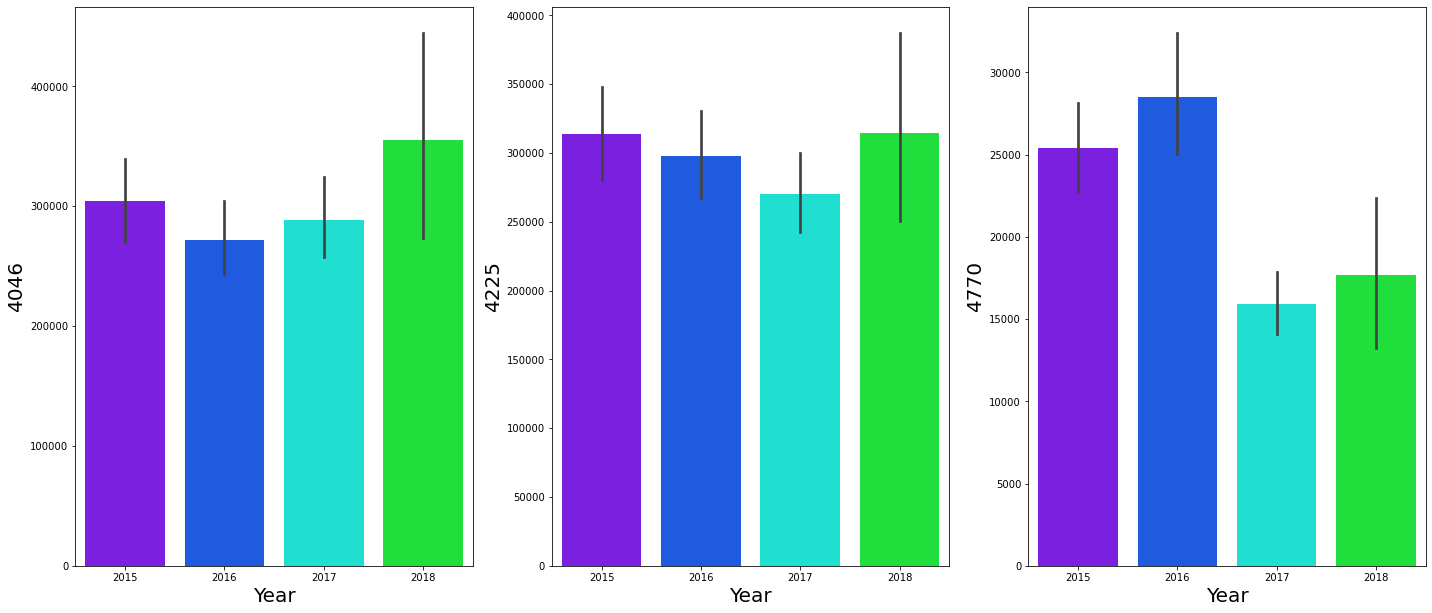

In [86]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and  PLU 4770, which is least produced. 

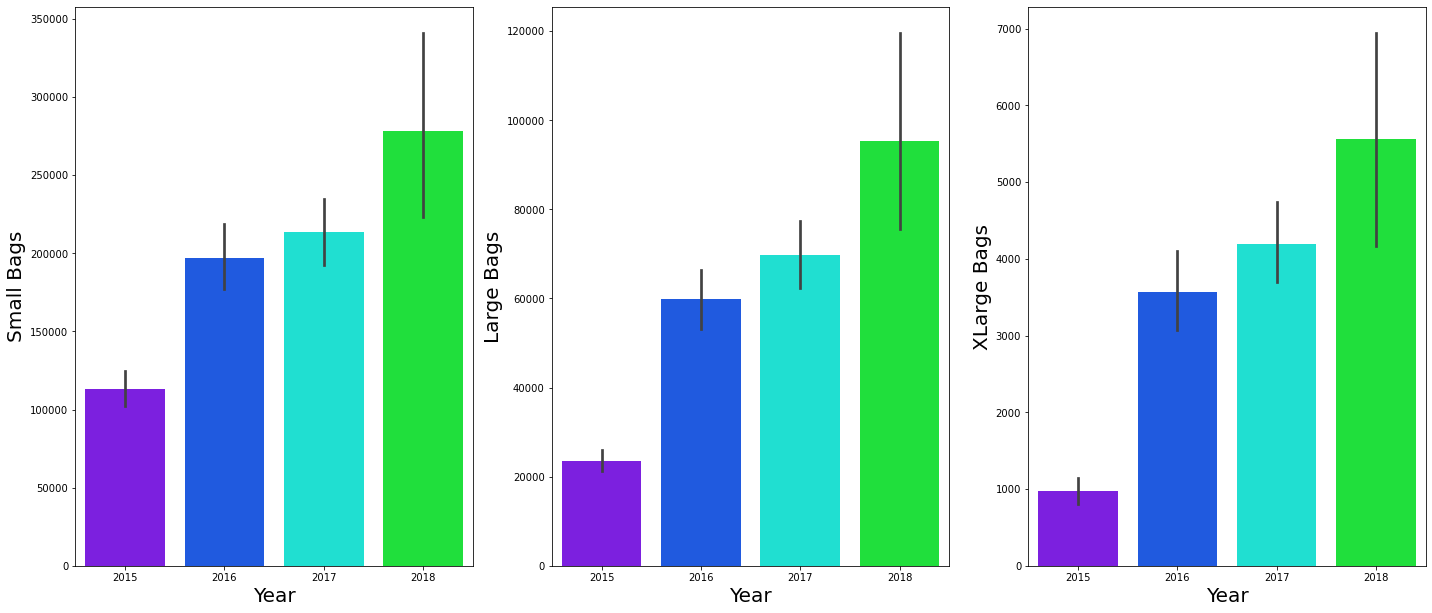

In [93]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- #### Comment:
    - Sale of all 3 types of bags has grown over the years. 
    - Most of customers prefer buying Small Bags over Large and Xlarge bags.
    - There is very narrow Customer segment willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it.

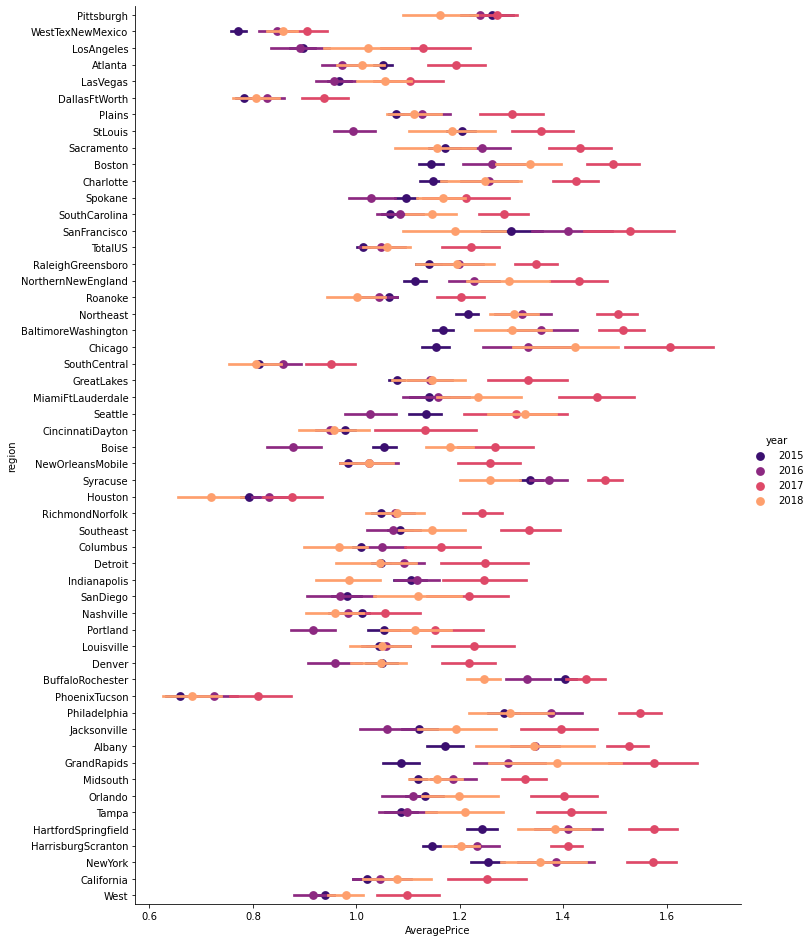

In [103]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

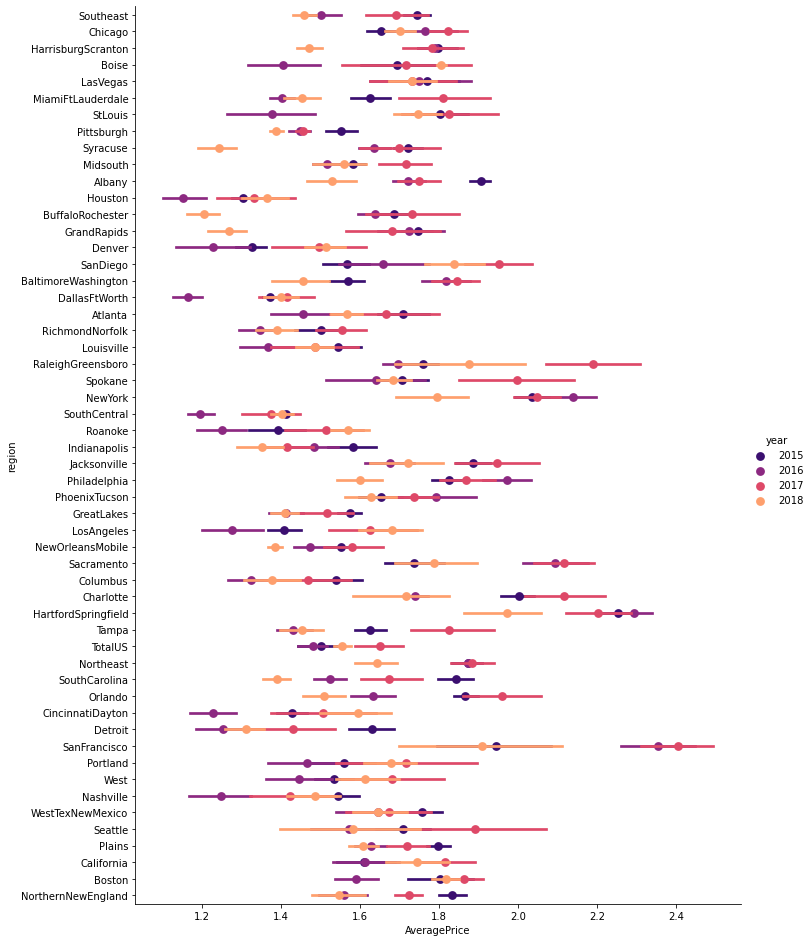

In [102]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

- The Average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high and price also high in the year 2017.

#### Pairplot

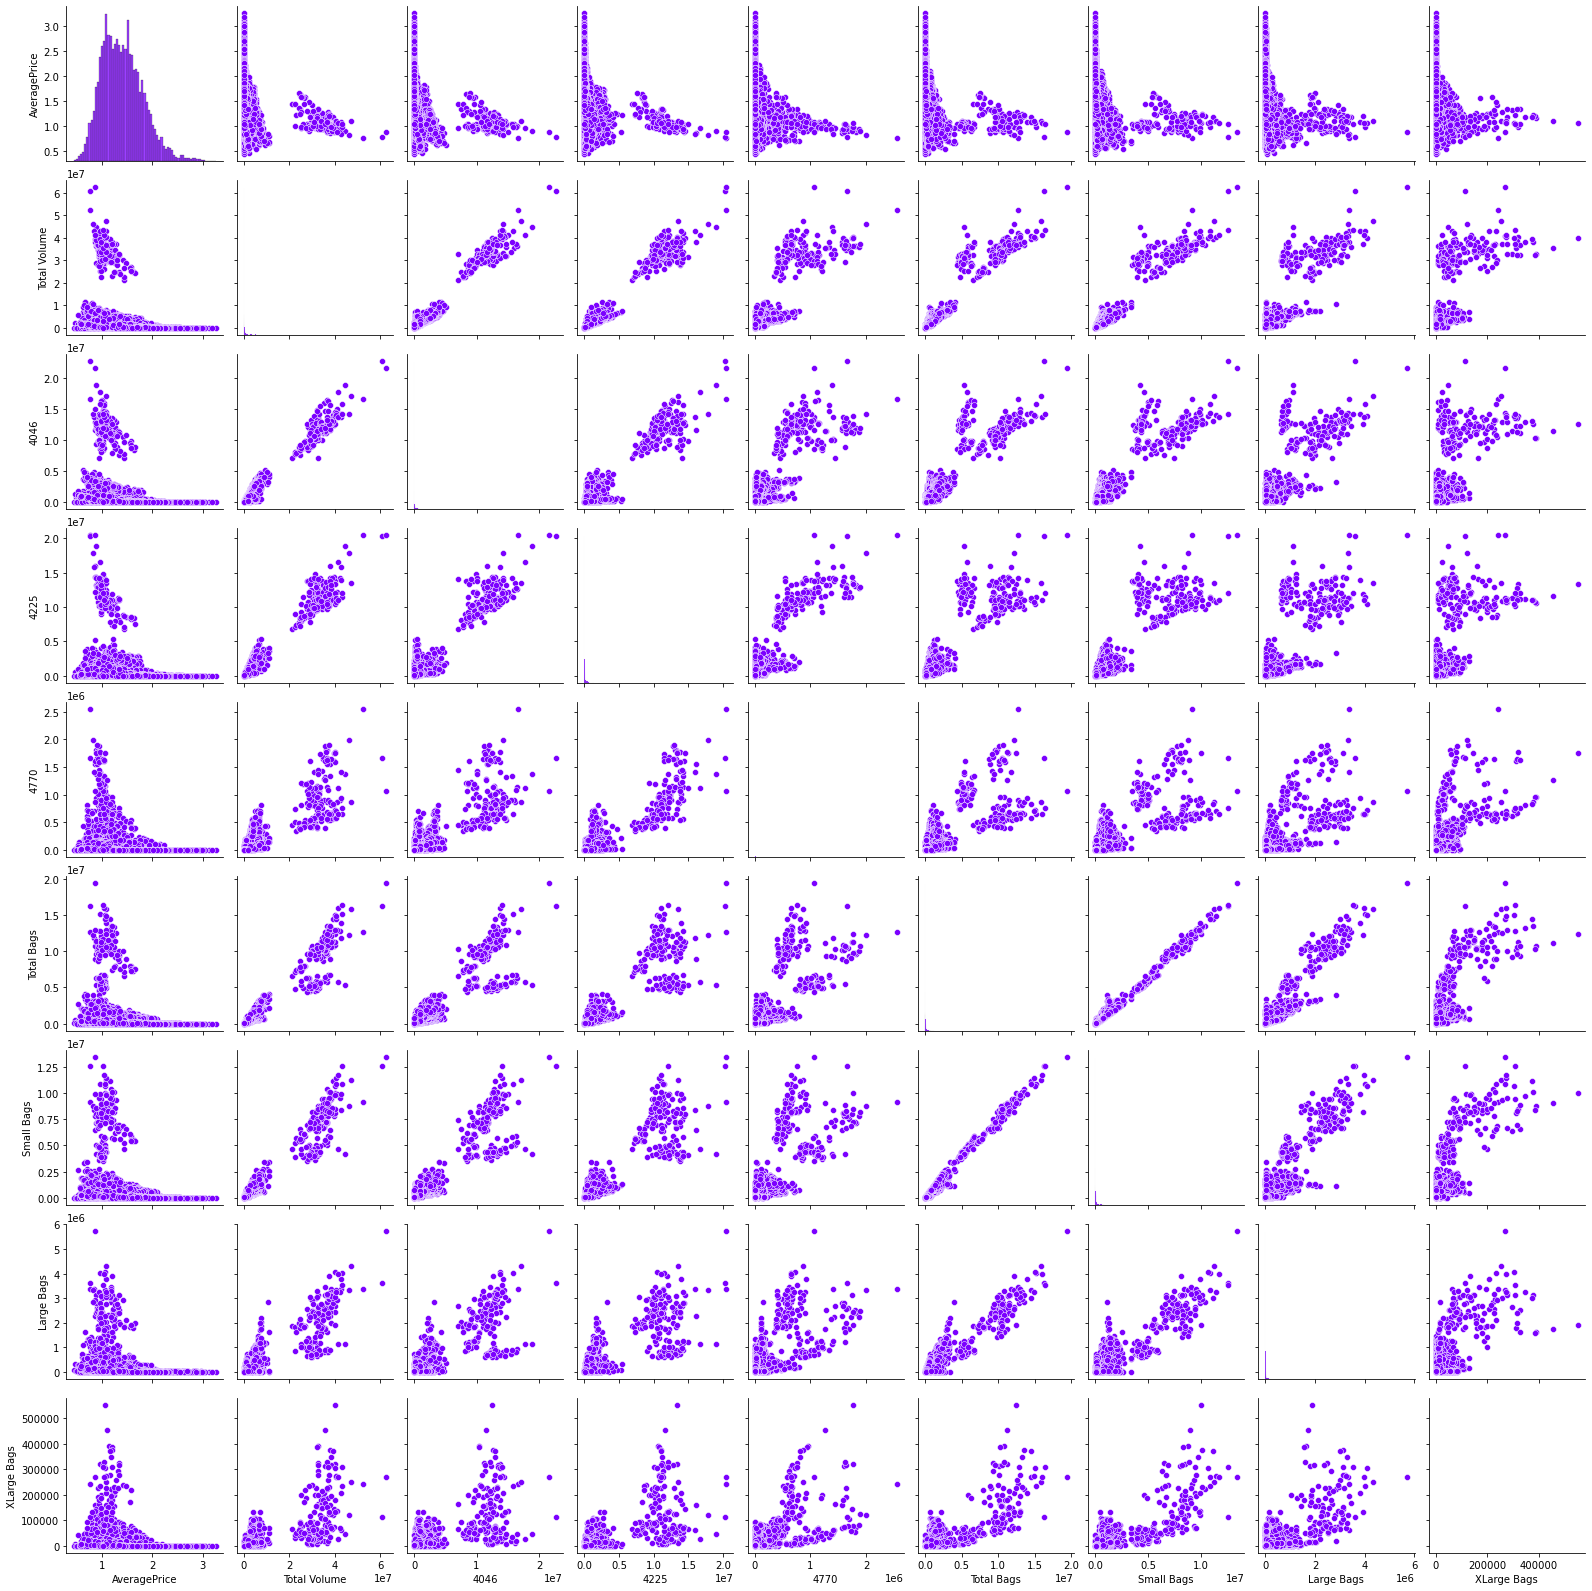

In [106]:
sns.pairplot(df2,palette="husl")

# Encoding categorical data

In [9]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8696.87     8603.62       93.25          0.0     0  2015       0  
1     9505.56     9408.07       97.49          0.0     0  2015       0  
2     8145.35     8042.21      103.14          0.0     0  2015       0  
3     5811.16     5677.40      133.76          0.0     0  2015       0  
4     6183.95     5986.26      197.69          0.0     0  2015       0

In [10]:
df.drop(["Date"], axis=1, inplace=True)

# Outliers Detection and Removal 

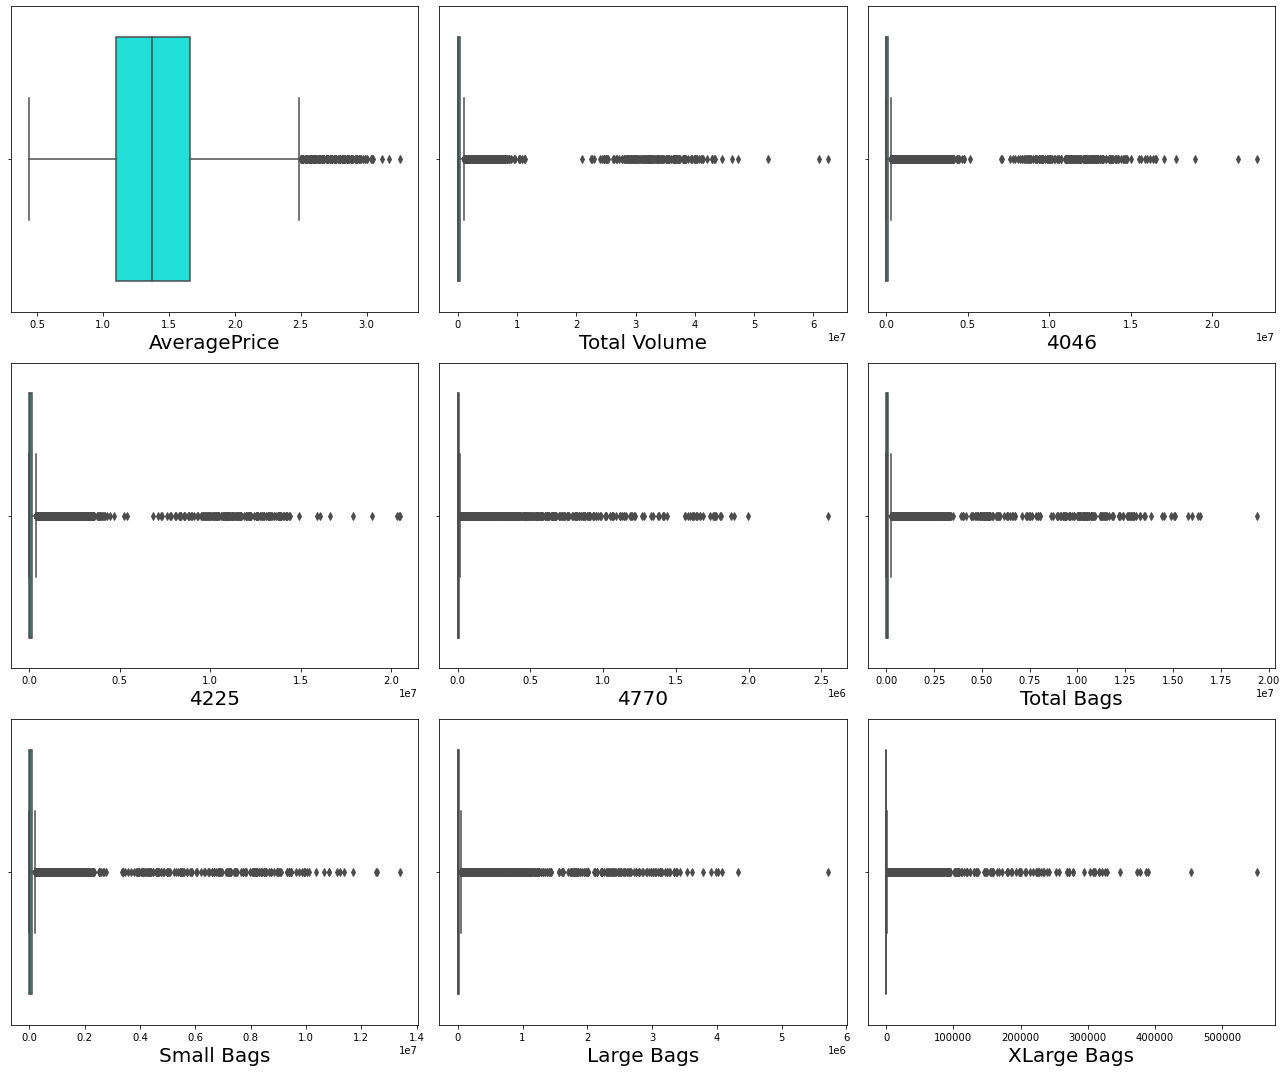

In [107]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [8]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (17651, 12)


In [30]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


###  Corrleation 

In [35]:
df1.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.580302 -0.537346 -0.435384 -0.495013   
Total Volume     -0.580302      1.000000  0.875354  0.900066  0.818046   
4046             -0.537346      0.875354  1.000000  0.739737  0.725446   
4225             -0.435384      0.900066  0.739737  1.000000  0.775653   
4770             -0.495013      0.818046  0.725446  0.775653  1.000000   
Total Bags       -0.566986      0.928706  0.765438  0.771848  0.750909   
Small Bags       -0.474088      0.863335  0.716691  0.696343  0.723369   
Large Bags       -0.470679      0.644861  0.552370  0.586721  0.525201   
XLarge Bags      -0.362711      0.614247  0.539334  0.542787  0.603807   
type              0.613150     -0.800140 -0.713862 -0.730539 -0.778713   
year              0.091704      0.082424  0.002064  0.006839 -0.051743   
region           -0.003242      0.068648  0.159353  0.033212  0.038776   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.566986   -0.474088   -0.470679    -0.362711  0.613150   
Total Volume    0.928706    0.863335    0.644861     0.614247 -0.800140   
4046            0.765438    0.716691    0.552370     0.539334 -0.713862   
4225            0.771848    0.696343    0.586721     0.542787 -0.730539   
4770            0.750909    0.723369    0.525201     0.603807 -0.778713   
Total Bags      1.000000    0.920842    0.685630     0.584338 -0.722171   
Small Bags      0.920842    1.000000    0.486811     0.551761 -0.701637   
Large Bags      0.685630    0.486811    1.000000     0.420044 -0.481150   
XLarge Bags     0.584338    0.551761    0.420044     1.000000 -0.623012   
type           -0.722171   -0.701637   -0.481150    -0.623012  1.000000   
year            0.225807    0.205358    0.192856     0.165585  0.003867   
region          0.064693    0.040210    0.077392    -0.032408  0.018409   

                  year    region  
AveragePrice  0.091704 -0.003242  
Total Volume  0.082424  0.068648  
4046          0.002064  0.159353  
4225          0.006839  0.033212  
4770         -0.051743  0.038776  
Total Bags    0.225807  0.064693  
Small Bags    0.205358  0.040210  
Large Bags    0.192856  0.077392  
XLarge Bags   0.165585 -0.032408  
type          0.003867  0.018409  
year          1.000000 -0.004417  
region       -0.004417  1.000000

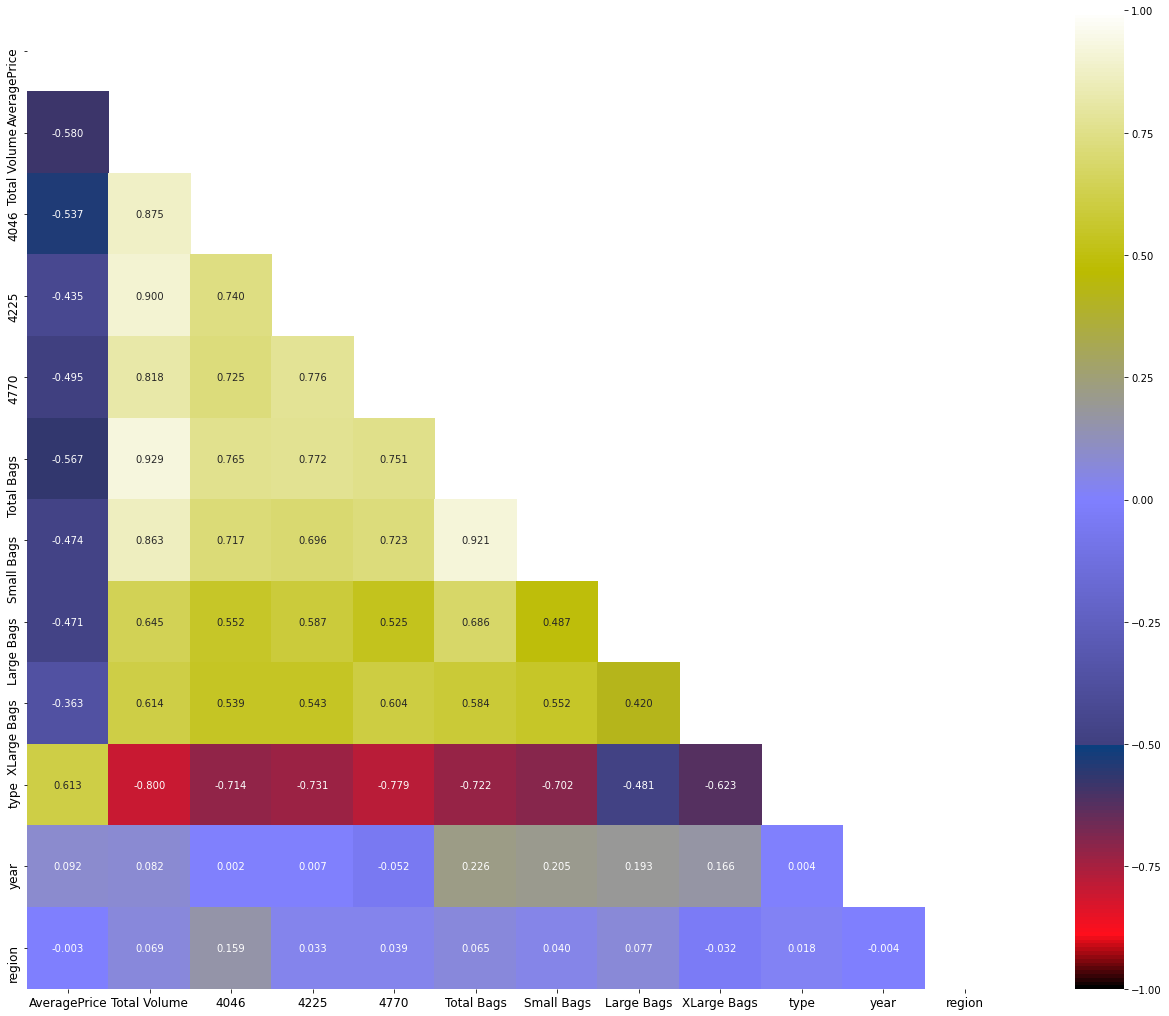

In [37]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,18))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

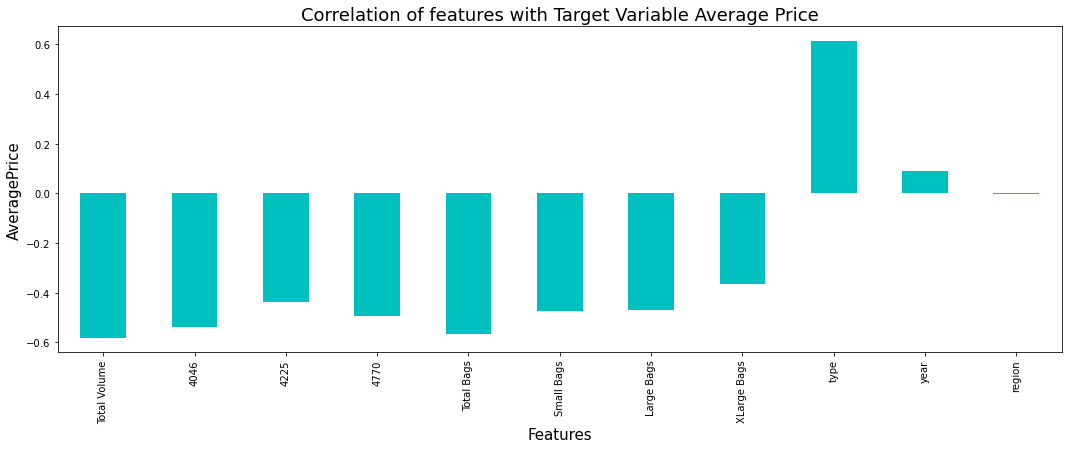

In [38]:
plt.figure(figsize = (18,6))
df1.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

<b>Almost all features are highly negatively correlated with the target variable and type have positive correlation with the target.</b>

## Skewness of features

In [21]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

#### Transforming skewness through log transform

In [9]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

###  Checking Multicollinearity between features using variance_inflation_factor

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF      Features
0     28.181877  AveragePrice
1   1093.001906  Total Volume
2     48.185624          4046
3    114.789804          4225
4      9.217063          4770
5    494.652153    Total Bags
6    155.069300    Small Bags
7     11.815827    Large Bags
8      2.539505   XLarge Bags
9      8.061908          type
10   193.706964          year
11     4.189108        region

#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by first way for further investigation. </b>

In [12]:
 df= df.drop(['Total Bags'], axis=1)

## Standard Scaling

In [13]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## PCA 

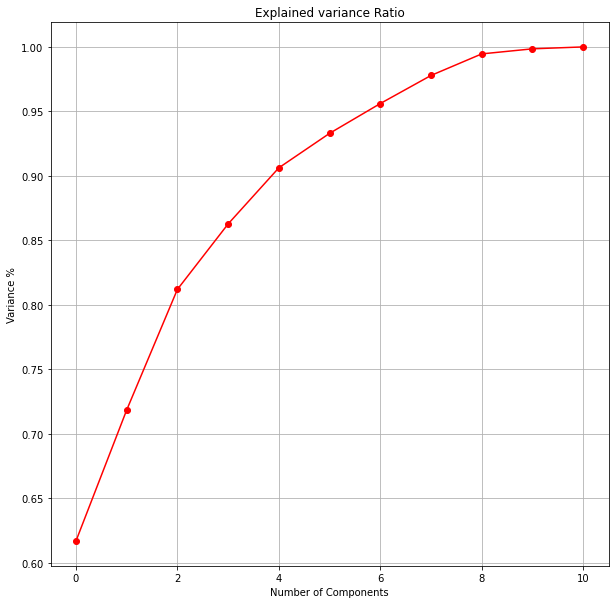

In [49]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 5 principal components attribute for 90% of variation in the data.  We shall pick the first 5 components for our prediction </b>

In [61]:
pca_new = PCA(n_components=4)
x_new = pca_new.fit_transform(X_scale)

In [62]:
principle_x=pd.DataFrame(x_new,columns=np.arange(4))

#### Checking Multicollinearity after applying PCA

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2
3  1.0         3

<b> We can see that  Multicollinearity issue is clear now.</b>

# Machine Learning Model Building

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (12774, 10)
Training target vector size: (12774,)
Test feature matrix size: (5475, 10)
Test target vector size: (5475,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.436178889766233 on Random_state 113


## Linear Regression : Base model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=113, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.59430283 1.21893552 1.1738113  ... 1.08895169 1.42514831 1.15665993]


Actual Wins:
 9567     1.67
7977     1.30
4597     1.42
9275     1.56
6983     1.33
         ... 
12196    1.88
107      1.04
2776     0.74
4354     1.18
4422     1.22
Name: AveragePrice, Length: 6023, dtype: float64


### Linear Regression Evaluation Matrix

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.23376867258621603
Mean squared error : 0.0924744905882754
Root Mean Squared Error: 0.30409618640863517


 R2 Score :
0.436178889766233


In [20]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -8.375215984363168


## Applying other Regression Model, Evaluation & Crossvalidation

In [ ]:
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)

ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 0.07314351408766166
Mean squared error : 0.009092447410935765
Root Mean Squared Error: 0.09535432560159904


 R2 Score :
0.671063429132326


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : -0.38811364293582334


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 0.13573124029814304
Mean squared error : 0.027641947470567713
Root Mean Squared Error: 0.1662586763768066


 R2 Score :
-2.350473149448362e-10


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : -1.3866722227016572


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 0.08919049370982823
Mean squared error : 0.012803128225053612
Root Mean Squared Error: 0.11315090907745112


 R2 Score :
0.5368224962551815


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : -0.19770

# Hyper Parameter Tuning : GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [23]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [ ]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


<b> I waited for almost hour for 2-3 times, but I did not get any output of Grid search CV. This May be due to computational Limitation. So I am going forward with Final Model by Manual defining parameter.</b>

# Final Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.11893122919391254
Mean squared error : 0.028762262829485578
Root Mean Squared Error: 0.16959440683432217


 R2 Score of Final Model :
0.8246351955204817




 True Values Vs Predicted Value plot :


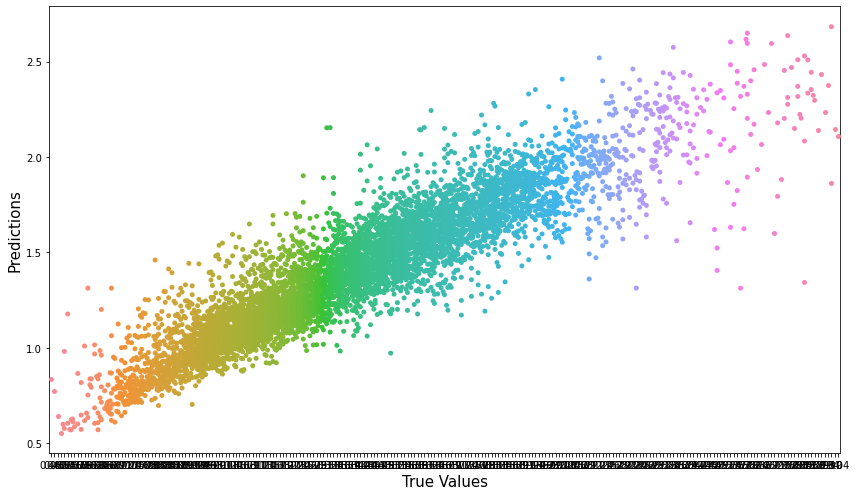

In [26]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Saving model

In [25]:
import joblib
joblib.dump(Final_mod,'Avacado_Final.pkl')

['Avacado_Final.pkl']